In [100]:
%pylab inline
import seaborn; seaborn.set_style('whitegrid')
import itertools, sklearn

from umap import UMAP
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook as tqdm
import scipy as sp

numpy.random.seed(0)

def sparsify_knn_mat(matmat, out_path, k = 15):
    newmat = sp.sparse.csr_matrix(matmat.shape)
    nbrlist = matmat[:, 1:(k+1)]
    for i in range(matmat.shape[0]):
        newmat[i, nbrlist[i,:]] = 1
        if i%1000 == 0:
            print(i)
    sp.sparse.save_npz('data/embeddings/{}.npz'.format(out_path), newmat)

Populating the interactive namespace from numpy and matplotlib


In [102]:
import keras

Using TensorFlow backend.


In [103]:
keras.models.load_model()

AttributeError: module 'keras' has no attribute 'load_model'

In [2]:
experiments = numpy.loadtxt("data/ENCODE_Tracks.txt", dtype=str, delimiter="\t")
celltypes = numpy.unique(experiments[:,0])
assays = numpy.unique(experiments[:,1])

experiments = numpy.array([(celltype, assay) for celltype, assay in itertools.product(celltypes, assays)])

rna_mask = numpy.array(['RNA' in assay or 'CAGE' in assay or 'RAMPAGE' in assay for assay in experiments[:,1]], dtype=bool)
tf_mask = numpy.array(['ChIP' in assay and assay[9]+assay[11] != 'HK' for assay in experiments[:,1]], dtype=bool)
his_mask = numpy.array(['ChIP' in assay and assay[9]+assay[11] == 'HK' for assay in experiments[:,1]], dtype=bool)
acc_mask = numpy.array(['ATAC' in assay or 'DNase' in assay for assay in experiments[:,1]], dtype=bool)

experiment_embedding = numpy.load("data/experiment_embedding4.npz")['arr_0']

In [11]:
experiment_embedding_large = numpy.load("data/correlations_33600_600000.npz")['arr_0']
nbr_list_sorted = np.argsort(experiment_embedding_large, axis=1)[:,::-1]
np.save('data/embeddings/experiments_nbrs_sorted.npy', nbr_list_sorted)

In [56]:
k = 15
sparsify_knn_mat(nbr_list_sorted, 'experiments_{}nn'.format(k), k=k)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  """


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


In [74]:
#a = sklearn.metrics.pairwise_distances(experiment_embedding)
nbe = np.argsort(a, axis=1)[:, 1:]

In [98]:
experiment_embedding_large#nbe

array([[ 1.        ,  0.07993104,  0.11051523, ...,  0.03826002,
         0.0626516 ,  0.05372972],
       [ 0.07993104,  1.        , -0.02544367, ..., -0.02278942,
         0.17519465,  0.00734791],
       [ 0.11051523, -0.02544367,  1.        , ...,  0.12181895,
         0.03282018,  0.17333087],
       ...,
       [ 0.03826002, -0.02278942,  0.12181895, ...,  1.        ,
        -0.02181075,  0.12612498],
       [ 0.0626516 ,  0.17519465,  0.03282018, ..., -0.02181075,
         1.        ,  0.02784258],
       [ 0.05372972,  0.00734791,  0.17333087, ...,  0.12612498,
         0.02784258,  1.        ]], dtype=float32)

In [87]:
k = 15
sparsify_knn_mat(nbe, 'experiments_{}nn'.format(k), k=k)

array([[    0, 26208, 14952, ...,  5747,  2247, 24400],
       [    1, 11664, 24697, ...,  2051,  2981, 24400],
       [    2, 17810, 31418, ..., 23645,  2981, 24400],
       ...,
       [33597, 33591, 22082, ..., 23645,  2981, 24400],
       [33598,   838,  8818, ..., 16219, 24393, 24400],
       [33599, 28055,  9155, ...,  2336,  2981, 24400]])

In [29]:
experiments = numpy.loadtxt("data/ENCODE_Tracks.txt", dtype=str, delimiter="\t")
experiments = numpy.array([(celltype, assay) for celltype, assay in experiments if 'minus' not in assay])
celltypes = numpy.unique(experiments[:,0])
assays = numpy.unique(experiments[:,1])

all_experiments = {(celltype, assay): i for i, (celltype, assay) in enumerate(itertools.product(celltypes, assays))}
mask = numpy.array([all_experiments[(celltype, assay)] for (celltype, assay) in experiments])

all_experiments = numpy.array([(celltype, assay) for celltype, assay in itertools.product(celltypes, assays)])
m = numpy.array(['minus' not in b for _, b in all_experiments])
all_experiments = all_experiments[m]

rna_mask = numpy.array(['RNA' in assay or 'CAGE' in assay or 'RAMPAGE' in assay for assay in all_experiments[:,1]], dtype=bool)
tf_mask =  numpy.array(['ChIP' in assay and (assay[9] != 'H' or assay[9:11] == 'HD') for assay in all_experiments[:,1]], dtype=bool)
his_mask =  numpy.array(['ChIP' in assay and (assay[9] == 'H' and assay[10] != 'D') for assay in all_experiments[:,1]], dtype=bool)
acc_mask =   numpy.array(['ATAC' in assay or 'DNase' in assay for assay in all_experiments[:,1]], dtype=bool)

rrna_mask = numpy.array(['RNA' in assay or 'CAGE' in assay or 'RAMPAGE' in assay for assay in experiments[:,1] if 'minus' not in assay], dtype=bool)
rtf_mask = numpy.array(['ChIP' in assay and (assay[9] != 'H' or assay[9:11] == 'HD') for assay in experiments[:,1] if 'minus' not in assay], dtype=bool)
rhis_mask = numpy.array(['ChIP' in assay and (assay[9] == 'H' and assay[10] != 'D') for assay in experiments[:,1] if 'minus' not in assay], dtype=bool)
racc_mask = numpy.array(['ATAC' in assay or 'DNase' in assay for assay in experiments[:,1] if 'minus' not in assay], dtype=bool)

imputed_correlations = numpy.load("data/correlations_33600_600000.npz")['arr_0'] ** 2

In [33]:
#imputed_correlations
itime = time.time()
nbr_list_sorted = np.argsort(imputed_correlations, axis=1)[:, 1:]
print(time.time() - itime)

74.24441695213318


In [3]:
#imputed_correlations = 1 - numpy.load("correlations_30800_600000.npz")['arr_0'] ** 2
#X_umap_corr = UMAP(200, metric='precomputed', random_state=111, min_dist=0.75).fit_transform(imputed_correlations)

#real_correlations = 1 - numpy.load("correlations_3150_600000.npz")['arr_0'] ** 2
#X_umap_real_corr = UMAP(200, metric='precomputed', random_state=111, min_dist=0.75).fit_transform(real_correlations)

#numpy.savez_compressed("umap_imputed_30800_600000.npz", X_umap_corr)
#numpy.savez_compressed("umap_real_3150_600000.npz", X_umap_real_corr)

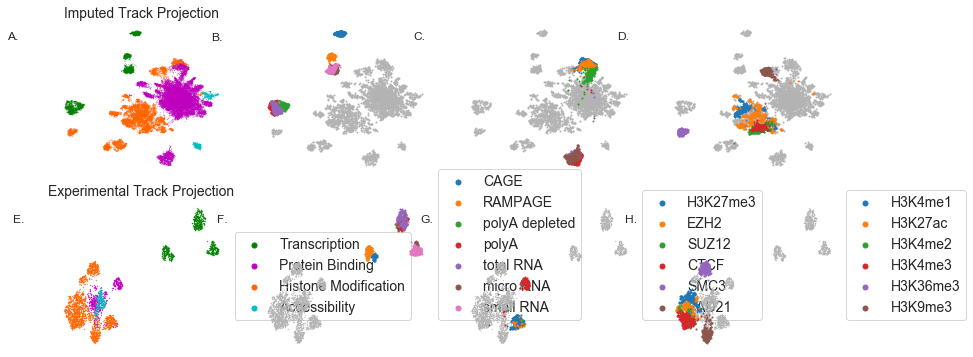

In [17]:
X_umap_corr = numpy.load("data/umap_imputed_30800_600000.npz")['arr_0']
X_umap_real_corr = numpy.load("data/umap_real_3150_600000.npz")['arr_0']

plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(241)
plt.title("Imputed Track Projection", fontsize=14)
plt.scatter(*X_umap_corr[rna_mask].T, color='g', s=.01)
plt.scatter(*X_umap_corr[tf_mask].T, color='m', s=.01)
plt.scatter(*X_umap_corr[his_mask].T, color='#FF6600', s=.01)
plt.scatter(*X_umap_corr[acc_mask].T, color='c', s=.01)
plt.xlabel("UMAP 1", fontsize=12)
plt.ylabel("UMAP 2", fontsize=12)
plt.text(-25, 15, 'A.', fontsize=12)
plt.axis('off')

plt.subplot(245)
plt.title("Experimental Track Projection", fontsize=14)
plt.scatter(*X_umap_real_corr[rrna_mask].T, color='g', s=.1, label="Transcription")
plt.scatter(*X_umap_real_corr[rtf_mask].T, color='m', s=.1, label="Protein Binding")
plt.scatter(*X_umap_real_corr[rhis_mask].T, color='#FF6600', s=.1, label="Histone Modification")
plt.scatter(*X_umap_real_corr[racc_mask].T, color='c', s=.1, label="Accessibility")
plt.xlabel("UMAP 1", fontsize=12)
plt.ylabel("UMAP 2", fontsize=12)
plt.legend(fontsize=14, loc=(1.05, 0.2), markerscale=16)
plt.text(-30, 3, 'E.', fontsize=12)
plt.axis('off')

mask1 = all_experiments[:,1] == 'CAGE_plus_strand_signal_of_all_reads'
mask2 = all_experiments[:,1] == 'RAMPAGE_plus_strand_signal_of_all_reads'
mask3 = all_experiments[:,1] == 'polyA_depleted_RNA-seq_plus_strand_signal_of_all_reads'
mask4 = all_experiments[:,1] == 'polyA_RNA-seq_plus_strand_signal_of_all_reads'
mask5 = all_experiments[:,1] == 'microRNA-seq_plus_strand_signal_of_all_reads'
mask6 = all_experiments[:,1] == 'small_RNA-seq_plus_strand_signal_of_all_reads'
mask7 = all_experiments[:,1] == 'total_RNA-seq_plus_strand_signal_of_all_reads'

rmask1 = experiments[:,1] == 'CAGE_plus_strand_signal_of_all_reads'
rmask2 = experiments[:,1] == 'RAMPAGE_plus_strand_signal_of_all_reads'
rmask3 = experiments[:,1] == 'polyA_depleted_RNA-seq_plus_strand_signal_of_all_reads'
rmask4 = experiments[:,1] == 'polyA_RNA-seq_plus_strand_signal_of_all_reads'
rmask5 = experiments[:,1] == 'microRNA-seq_plus_strand_signal_of_all_reads'
rmask6 = experiments[:,1] == 'small_RNA-seq_plus_strand_signal_of_all_reads'
rmask7 = experiments[:,1] == 'total_RNA-seq_plus_strand_signal_of_all_reads'

plt.subplot(242)
plt.scatter(*X_umap_corr[::10].T, s=1, color='0.7')
plt.scatter(*X_umap_corr[mask1].T, s=1)
plt.scatter(*X_umap_corr[mask2].T, s=1)
plt.scatter(*X_umap_corr[mask3].T, s=1)
plt.scatter(*X_umap_corr[mask4].T, s=1)
plt.scatter(*X_umap_corr[mask7].T, s=1)
plt.scatter(*X_umap_corr[mask5].T, s=1)
plt.scatter(*X_umap_corr[mask6].T, s=1)
plt.text(-25, 15, 'B.', fontsize=12)
plt.axis('off')

plt.subplot(246)
plt.scatter(*X_umap_real_corr.T, s=0.1, color='0.7')
plt.scatter(*X_umap_real_corr[rmask1].T, s=1, label='CAGE')
plt.scatter(*X_umap_real_corr[rmask2].T, s=1, label='RAMPAGE')
plt.scatter(*X_umap_real_corr[rmask3].T, s=1, label='polyA depleted')
plt.scatter(*X_umap_real_corr[rmask4].T, s=1, label='polyA')
plt.scatter(*X_umap_real_corr[rmask7].T, s=1, label='total RNA')
plt.scatter(*X_umap_real_corr[rmask5].T, s=1, label='micro RNA')
plt.scatter(*X_umap_real_corr[rmask6].T, s=1, label='small RNA')
plt.text(-30, 3, 'F.', fontsize=12)
plt.axis('off')
plt.legend(fontsize=14, loc=(1.05, 0.2), markerscale=5)

mask1 = all_experiments[:,1] == 'ChIP-seq_H3K27me3_signal_p-value'
mask2 = all_experiments[:,1] == 'ChIP-seq_EZH2_signal_p-value'
mask3 = all_experiments[:,1] == 'ChIP-seq_SUZ12_signal_p-value'
mask4 = all_experiments[:,1] == 'ChIP-seq_CTCF_signal_p-value'
mask5 = all_experiments[:,1] == 'ChIP-seq_SMC3_signal_p-value'
mask6 = all_experiments[:,1] == 'ChIP-seq_RAD21_signal_p-value'

rmask1 = experiments[:,1] == 'ChIP-seq_H3K27me3_signal_p-value'
rmask2 = experiments[:,1] == 'ChIP-seq_EZH2_signal_p-value'
rmask3 = experiments[:,1] == 'ChIP-seq_SUZ12_signal_p-value'
rmask4 = experiments[:,1] == 'ChIP-seq_CTCF_signal_p-value'
rmask5 = experiments[:,1] == 'ChIP-seq_SMC3_signal_p-value'
rmask6 = experiments[:,1] == 'ChIP-seq_RAD21_signal_p-value'

plt.subplot(243)
plt.scatter(*X_umap_corr[::10].T, s=1, color='0.7')
plt.scatter(*X_umap_corr[mask1].T, s=1)
plt.scatter(*X_umap_corr[mask2].T, s=1)
plt.scatter(*X_umap_corr[mask3].T, s=1)
plt.scatter(*X_umap_corr[mask4].T, s=1)
plt.scatter(*X_umap_corr[mask5].T, s=1)
plt.scatter(*X_umap_corr[mask6].T, s=1)
plt.text(-25, 15, 'C.', fontsize=12)
plt.axis('off')

plt.subplot(247)
plt.scatter(*X_umap_real_corr.T, s=0.1, color='0.7')
plt.scatter(*X_umap_real_corr[rmask1].T, s=1, label='H3K27me3')
plt.scatter(*X_umap_real_corr[rmask2].T, s=1, label='EZH2')
plt.scatter(*X_umap_real_corr[rmask3].T, s=1, label='SUZ12')
plt.scatter(*X_umap_real_corr[rmask4].T, s=1, label='CTCF')
plt.scatter(*X_umap_real_corr[rmask5].T, s=1, label='SMC3')
plt.scatter(*X_umap_real_corr[rmask6].T, s=1, label='RAD21')
plt.text(-30, 3, 'G.', fontsize=12)
plt.axis('off')
plt.legend(fontsize=14, loc=(1.05, 0.2), markerscale=5)

mask1 = all_experiments[:,1] == 'ChIP-seq_H3K4me1_signal_p-value'
mask2 = all_experiments[:,1] == 'ChIP-seq_H3K27ac_signal_p-value'
mask3 = all_experiments[:,1] == 'ChIP-seq_H3K4me2_signal_p-value'
mask4 = all_experiments[:,1] == 'ChIP-seq_H3K4me3_signal_p-value'
mask5 = all_experiments[:,1] == 'ChIP-seq_H3K36me3_signal_p-value'
mask6 = all_experiments[:,1] == 'ChIP-seq_H3K9me3_signal_p-value'

rmask1 = experiments[:,1] == 'ChIP-seq_H3K4me1_signal_p-value'
rmask2 = experiments[:,1] == 'ChIP-seq_H3K27ac_signal_p-value'
rmask3 = experiments[:,1] == 'ChIP-seq_H3K4me2_signal_p-value'
rmask4 = experiments[:,1] == 'ChIP-seq_H3K4me3_signal_p-value'
rmask5 = experiments[:,1] == 'ChIP-seq_H3K36me3_signal_p-value'
rmask6 = experiments[:,1] == 'ChIP-seq_H3K9me3_signal_p-value'

plt.subplot(244)
plt.scatter(*X_umap_corr[::10].T, s=1, color='0.7')
plt.scatter(*X_umap_corr[mask1].T, s=1)
plt.scatter(*X_umap_corr[mask2].T, s=1)
plt.scatter(*X_umap_corr[mask3].T, s=1)
plt.scatter(*X_umap_corr[mask4].T, s=1)
plt.scatter(*X_umap_corr[mask5].T, s=1)
plt.scatter(*X_umap_corr[mask6].T, s=1)
plt.text(-25, 15, 'D.', fontsize=12)
plt.axis('off')

plt.subplot(248)
plt.scatter(*X_umap_real_corr.T, s=0.1, color='0.7')
plt.scatter(*X_umap_real_corr[rmask1].T, s=1, label='H3K4me1')
plt.scatter(*X_umap_real_corr[rmask2].T, s=1, label='H3K27ac')
plt.scatter(*X_umap_real_corr[rmask3].T, s=1, label='H3K4me2')
plt.scatter(*X_umap_real_corr[rmask4].T, s=1, label='H3K4me3')
plt.scatter(*X_umap_real_corr[rmask5].T, s=1, label='H3K36me3')
plt.scatter(*X_umap_real_corr[rmask6].T, s=1, label='H3K9me3')
plt.text(-30, 3, 'H.', fontsize=12)
plt.axis('off')
plt.legend(fontsize=14, loc=(1.05, 0.2), markerscale=5)

#plt.tight_layout()
plt.savefig("xselect-visualizations.pdf")
plt.show()

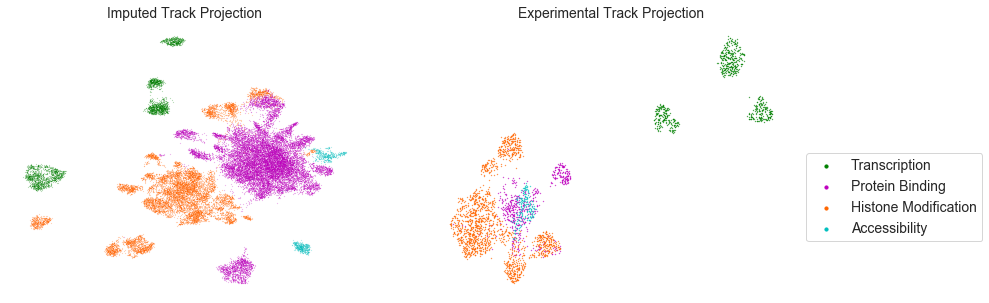

In [18]:
plt.figure(figsize=(14, 5), facecolor='w')
plt.subplot(121)
plt.title("Imputed Track Projection", fontsize=14)
plt.scatter(*X_umap_corr[rna_mask].T, color='g', s=.01, label="Transcription")
plt.scatter(*X_umap_corr[tf_mask].T, color='m', s=.01, label="Protein Binding")
plt.scatter(*X_umap_corr[his_mask].T, color='#FF6600', s=.01, label="Histone Modification")
plt.scatter(*X_umap_corr[acc_mask].T, color='c', s=.01, label="Accessibility")
plt.axis('off')

plt.subplot(122)
plt.title("Experimental Track Projection", fontsize=14)
plt.scatter(*X_umap_real_corr[rrna_mask].T, color='g', s=.1, label="Transcription")
plt.scatter(*X_umap_real_corr[rtf_mask].T, color='m', s=.1, label="Protein Binding")
plt.scatter(*X_umap_real_corr[rhis_mask].T, color='#FF6600', s=.1, label="Histone Modification")
plt.scatter(*X_umap_real_corr[racc_mask].T, color='c', s=.1, label="Accessibility")
plt.legend(fontsize=14, loc=(1.05, 0.2), markerscale=10)
plt.axis('off')
plt.show()

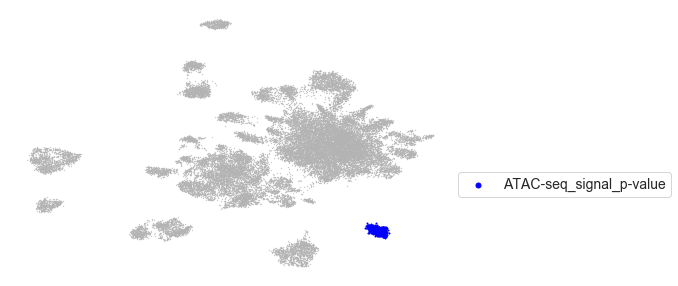

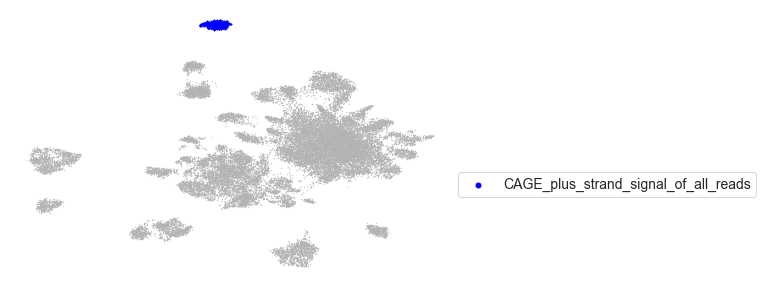

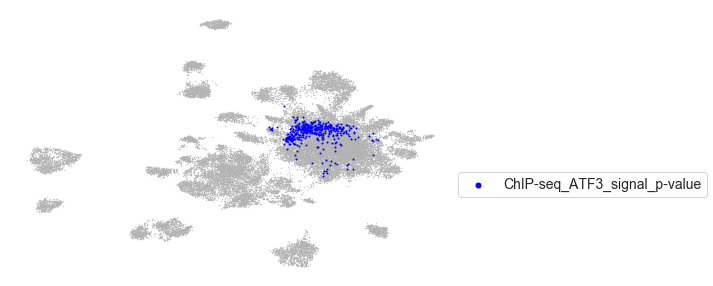

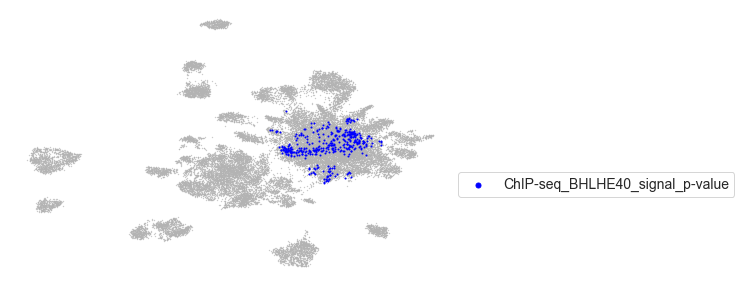

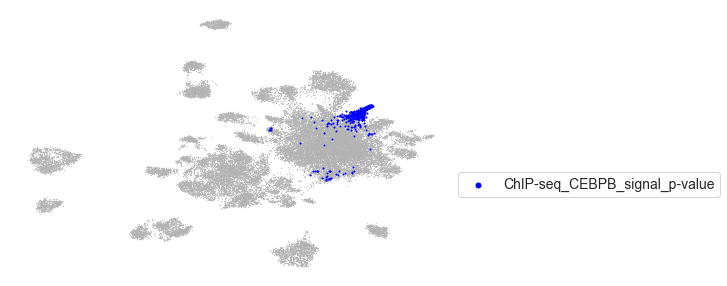

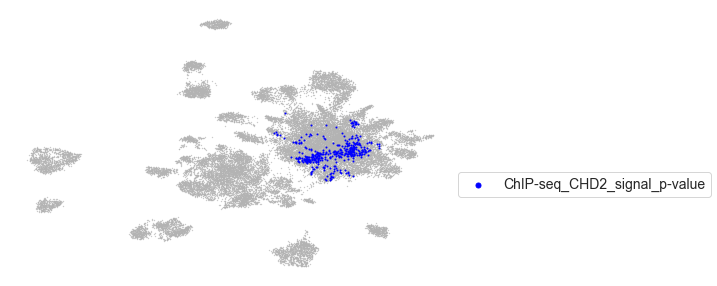

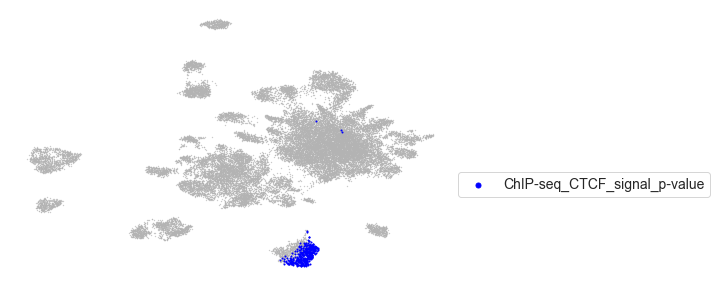

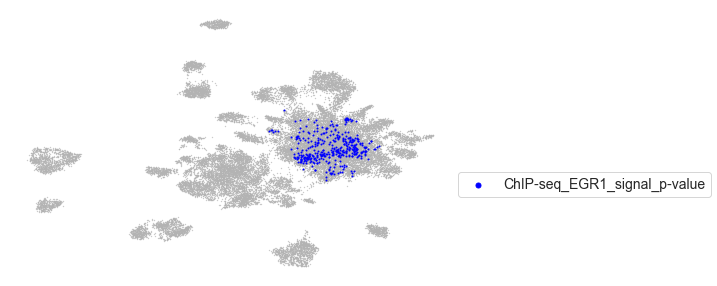

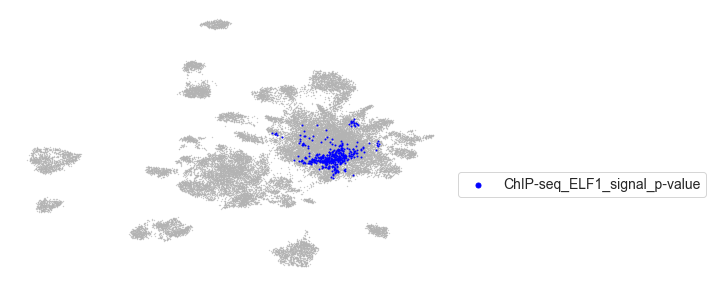

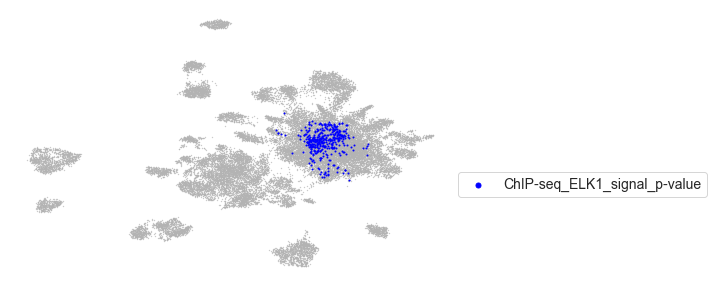

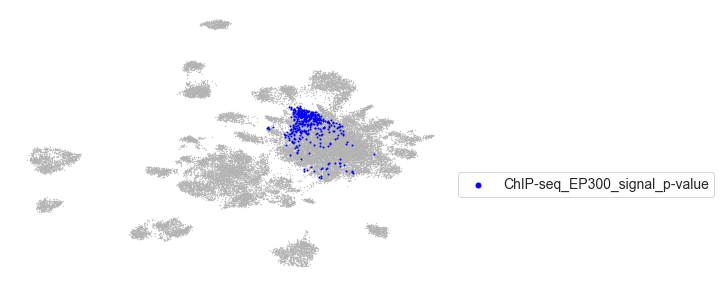

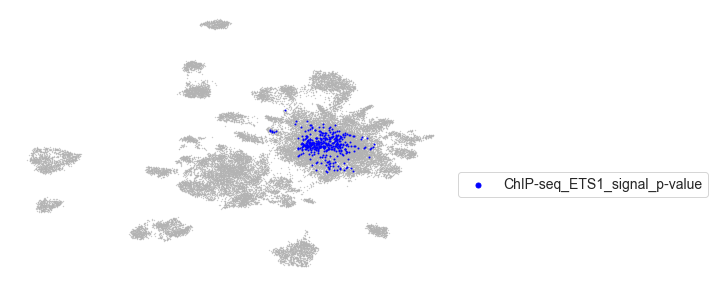

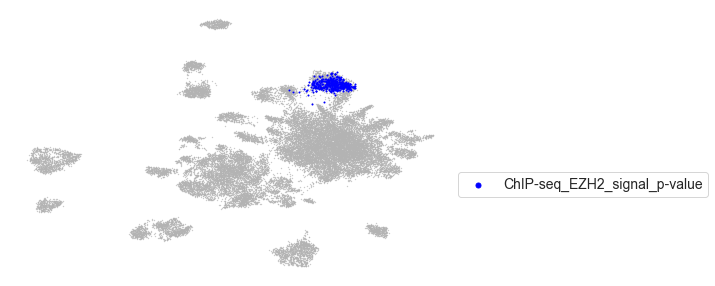

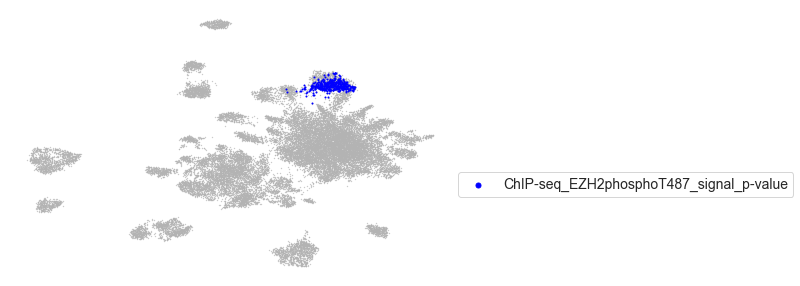

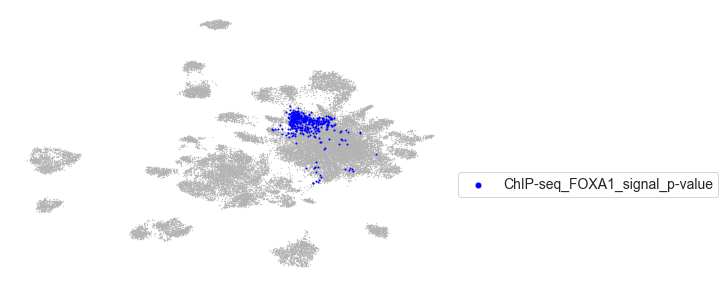

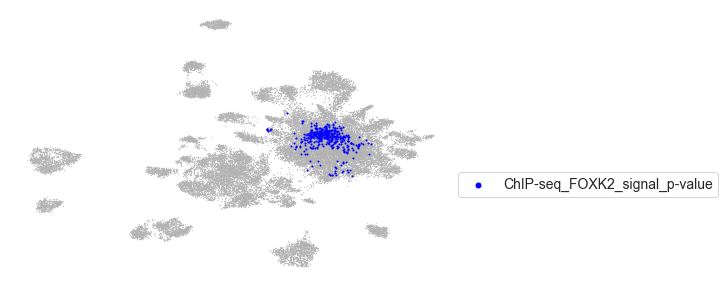

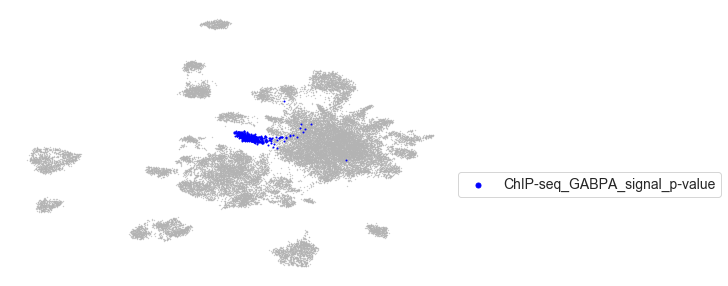

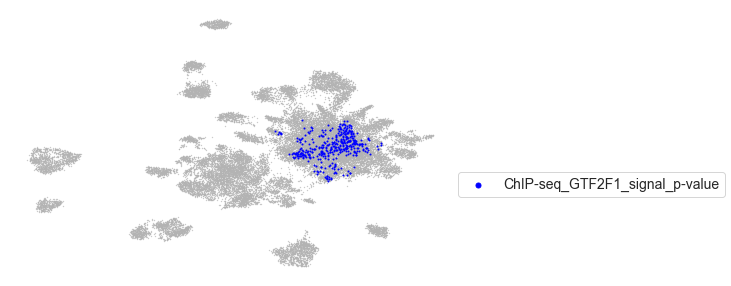

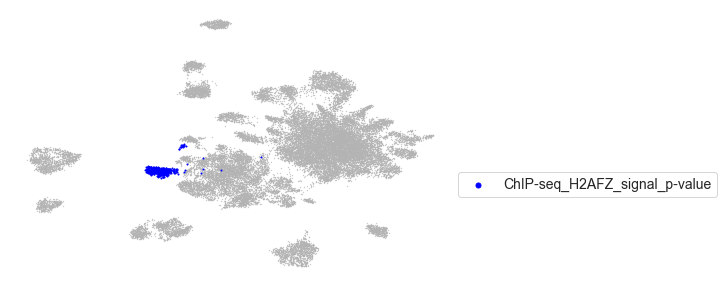

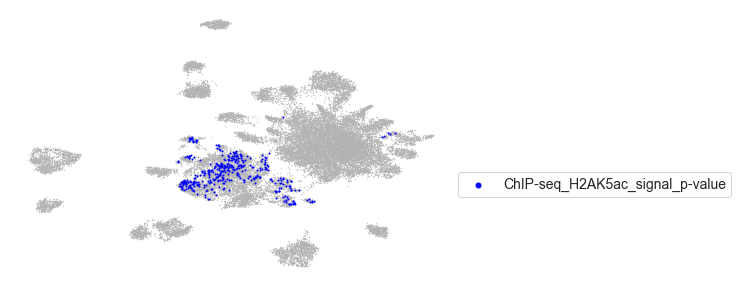

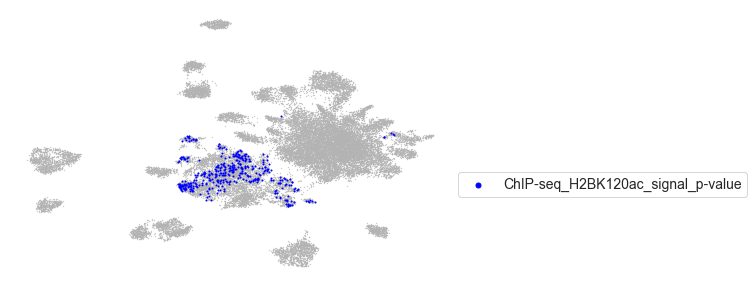

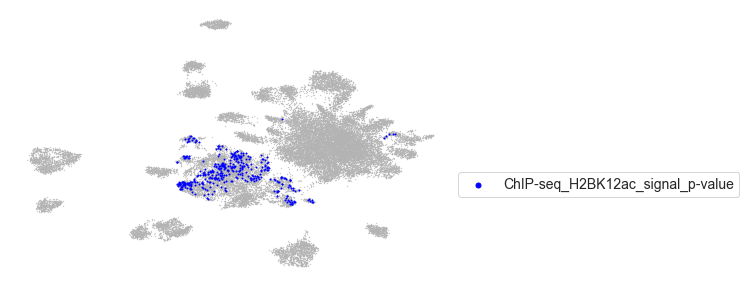

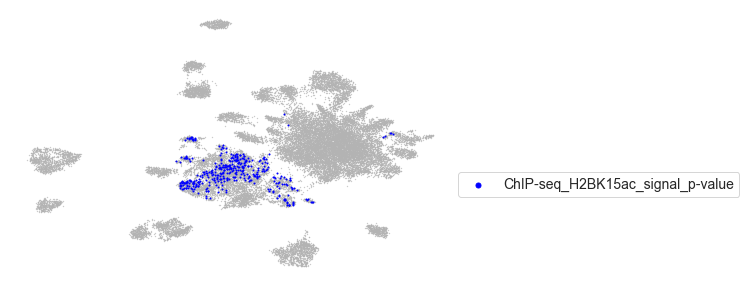

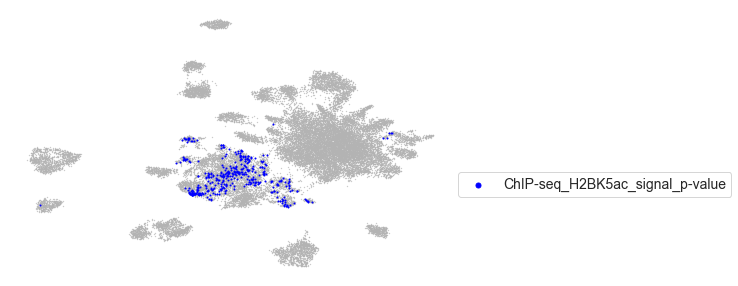

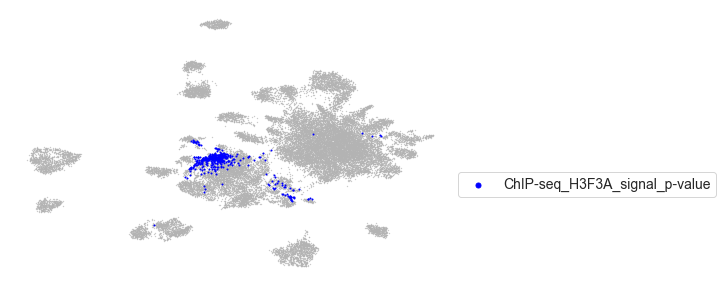

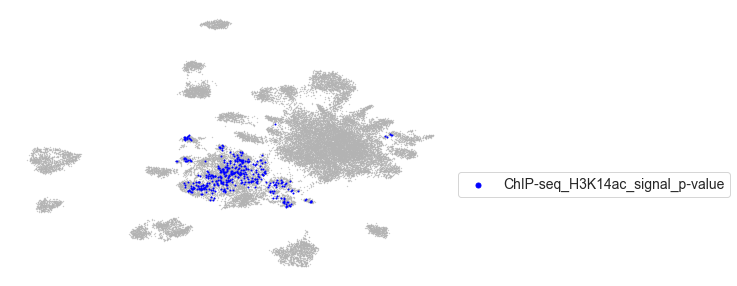

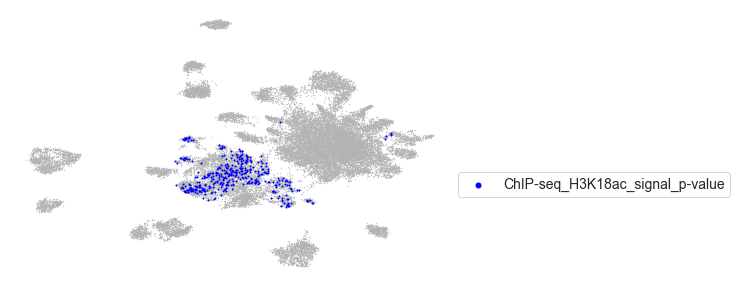

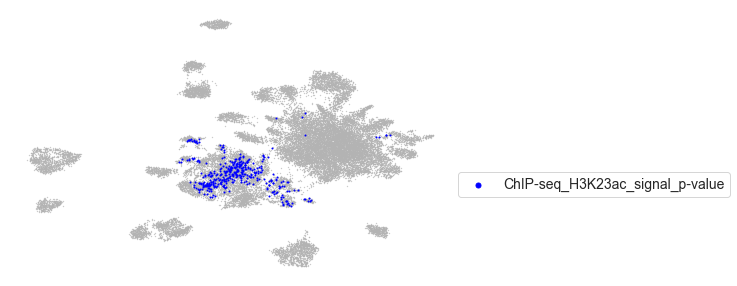

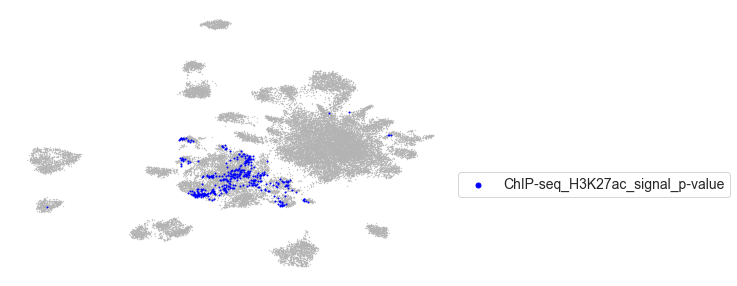

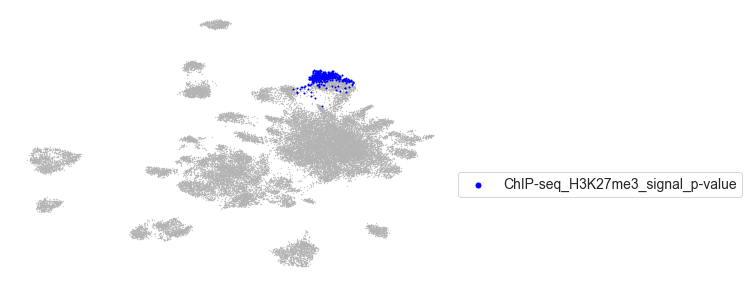

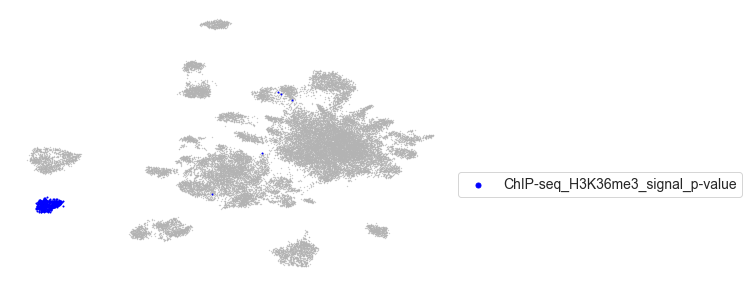

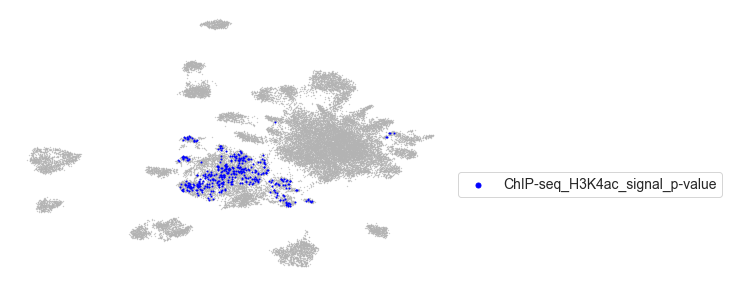

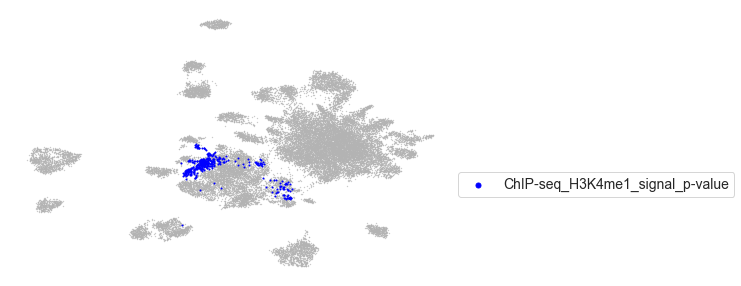

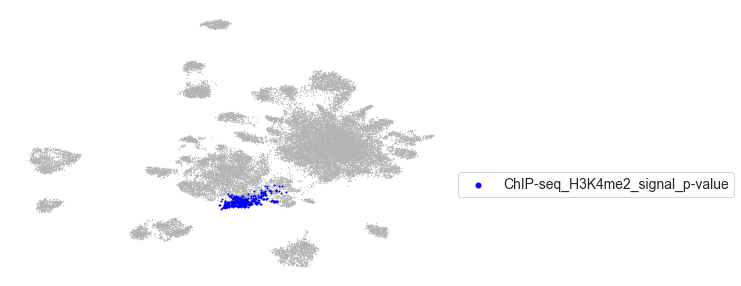

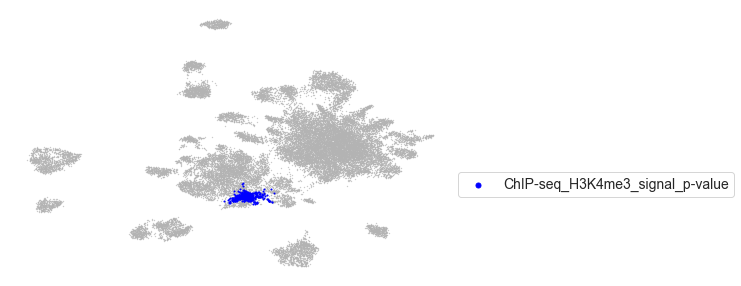

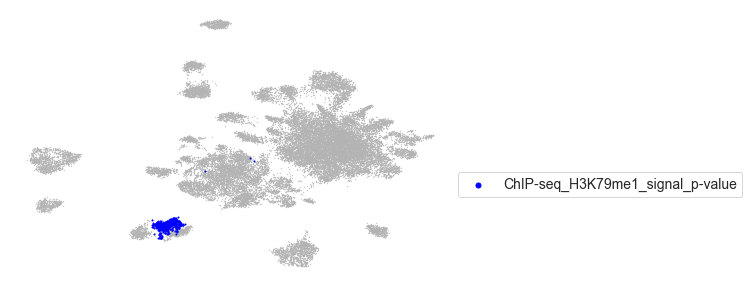

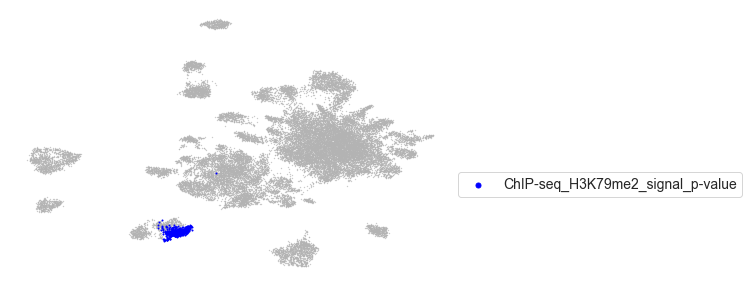

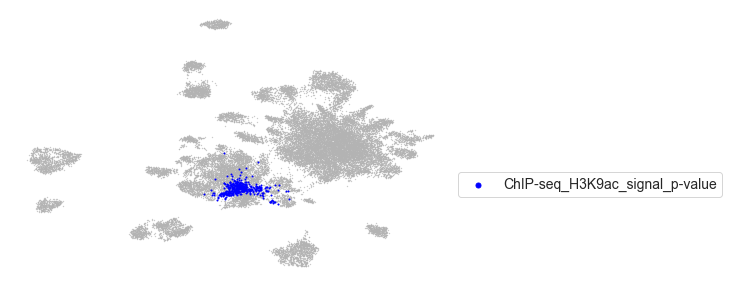

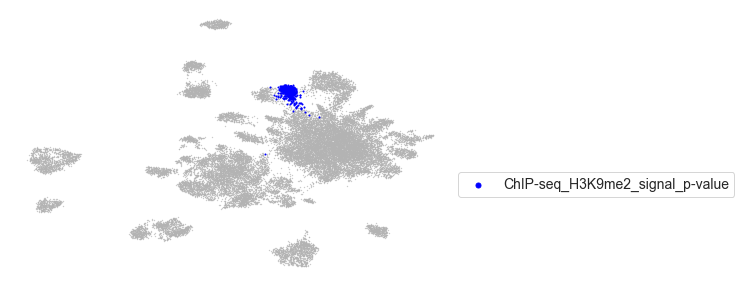

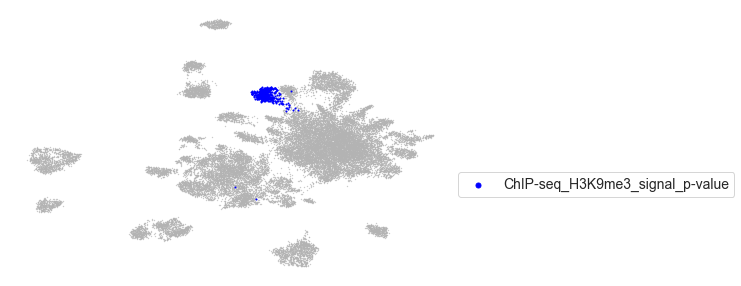

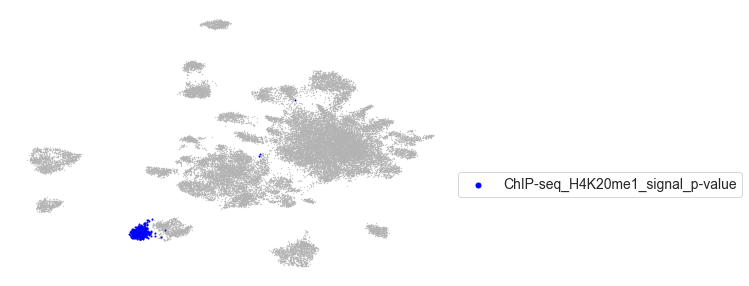

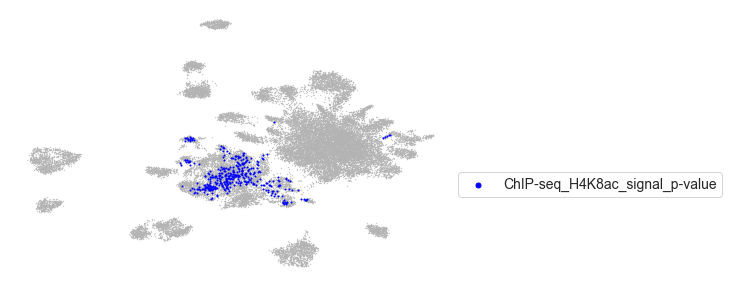

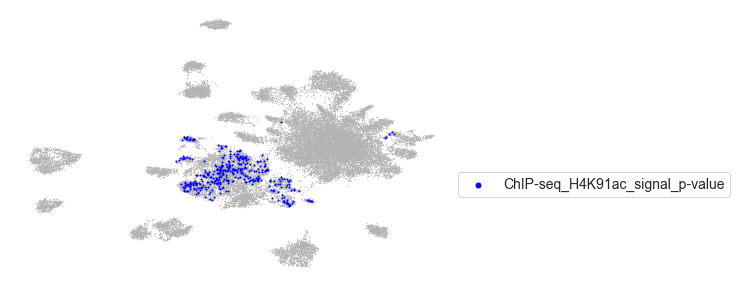

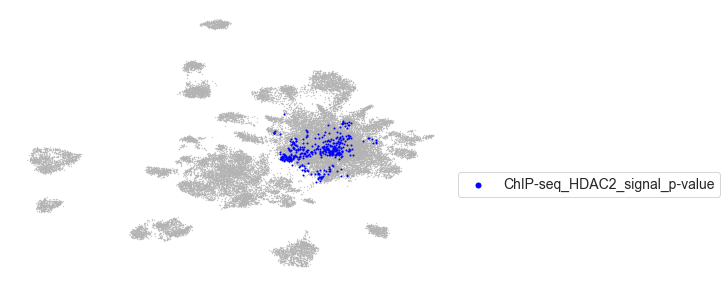

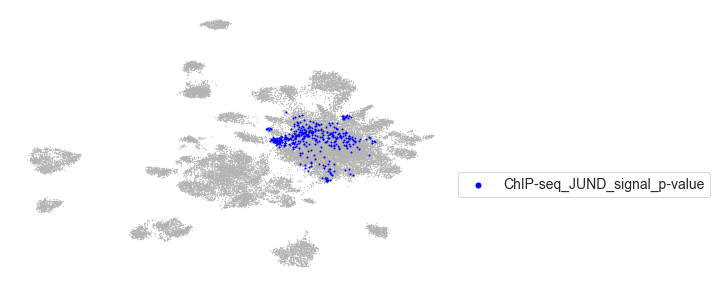

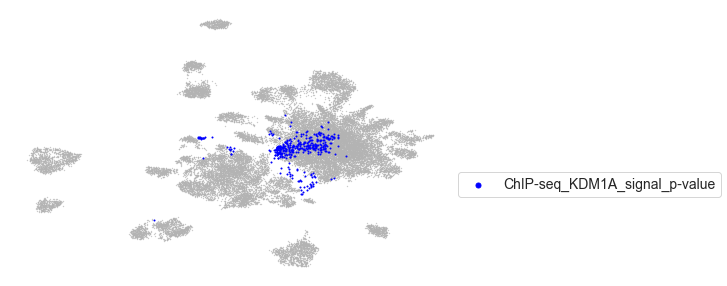

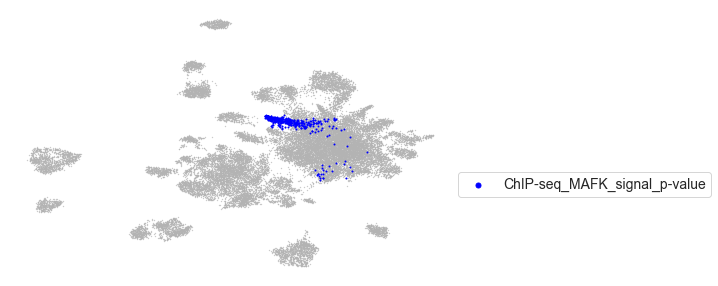

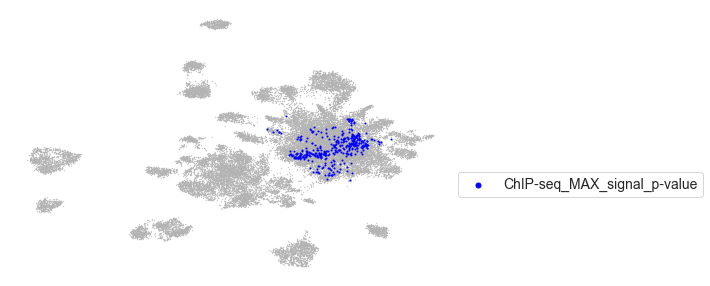

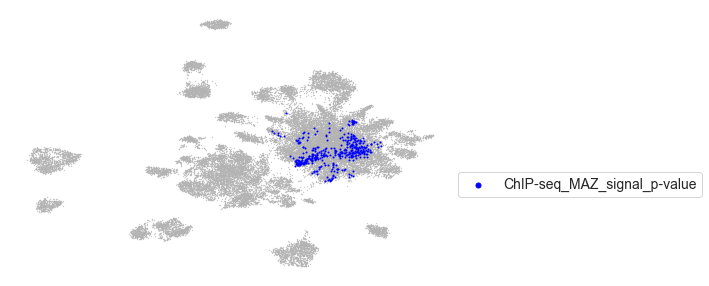

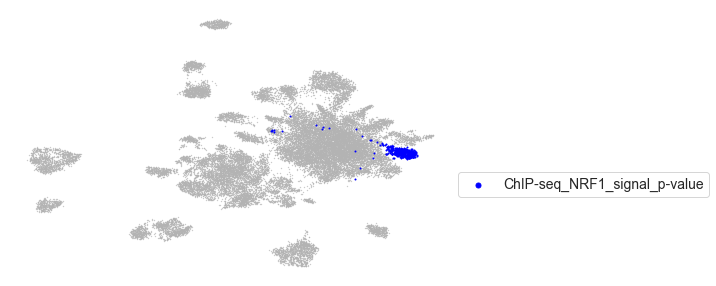

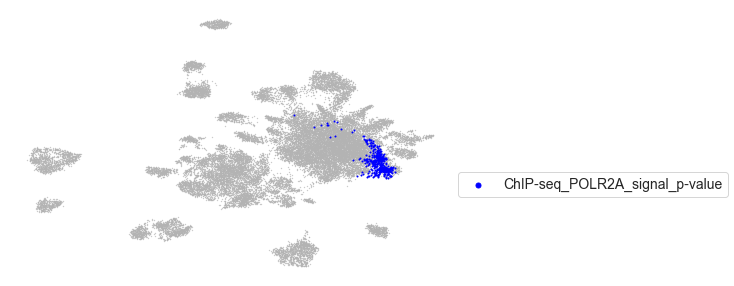

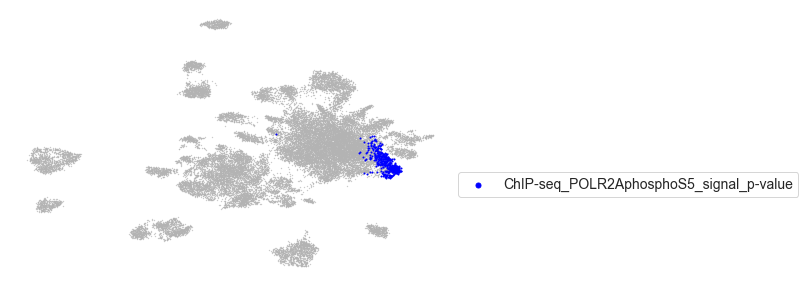

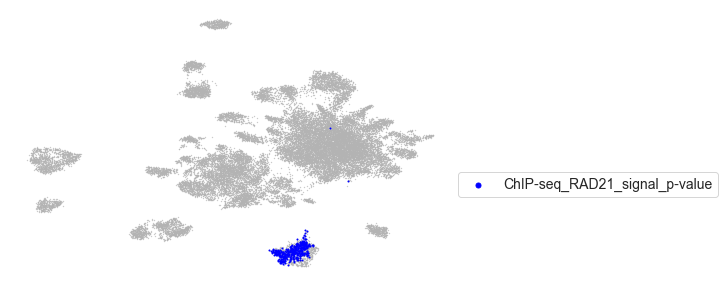

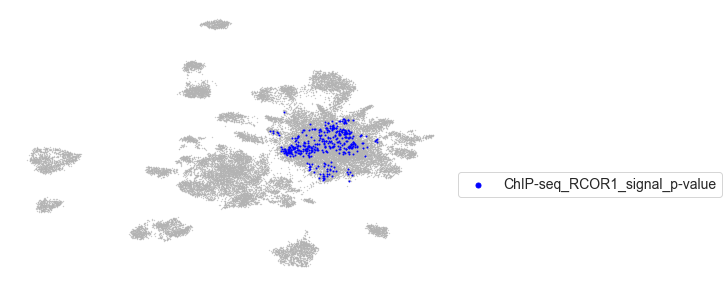

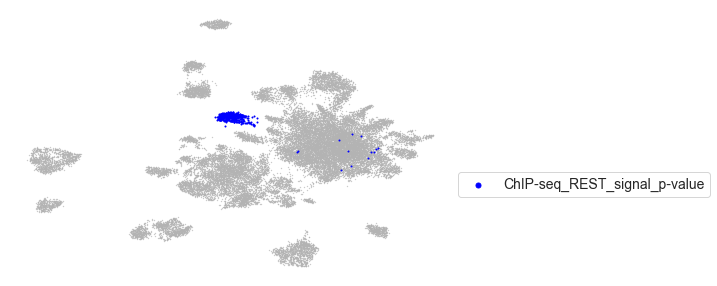

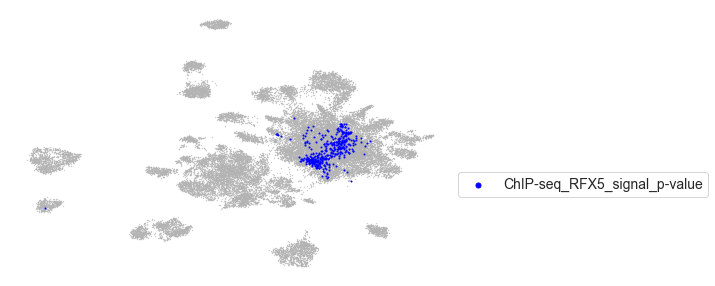

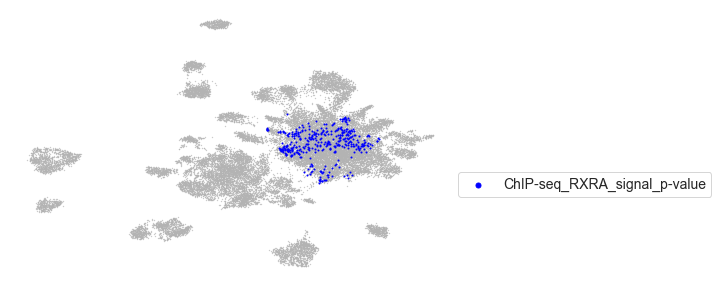

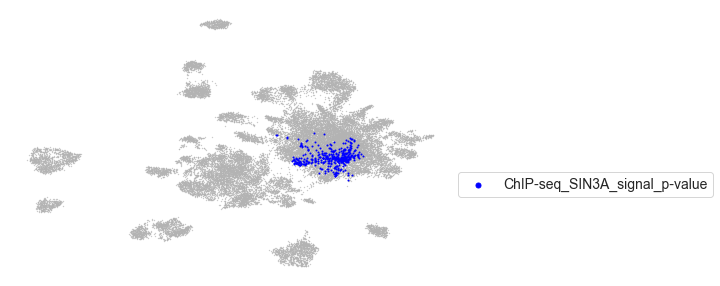

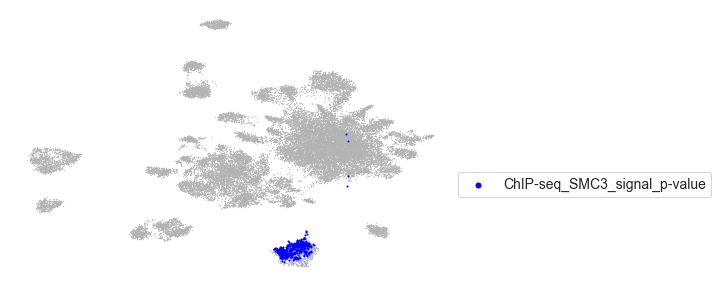

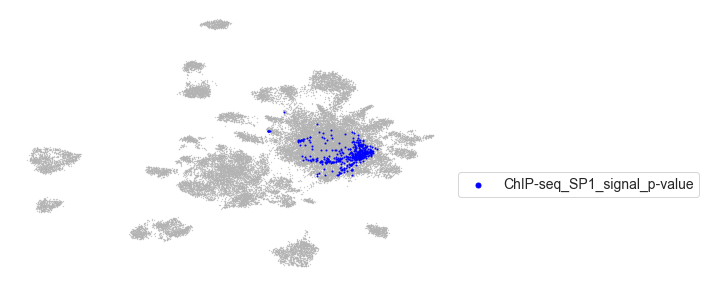

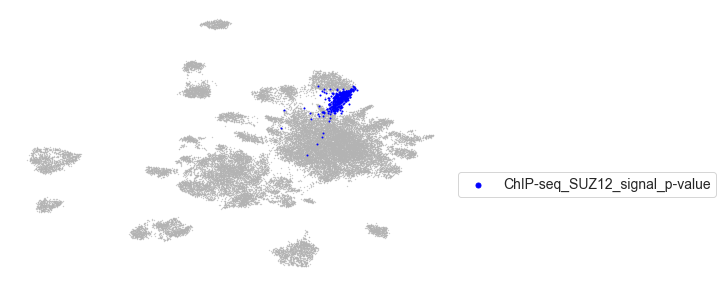

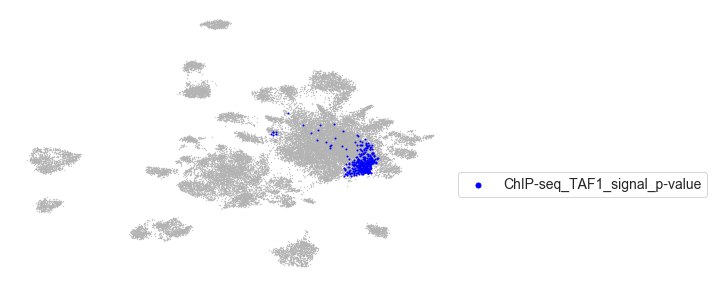

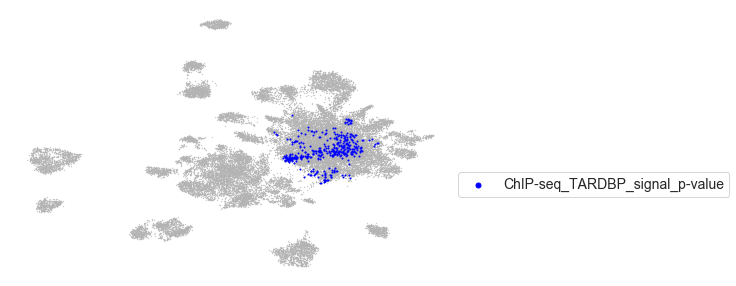

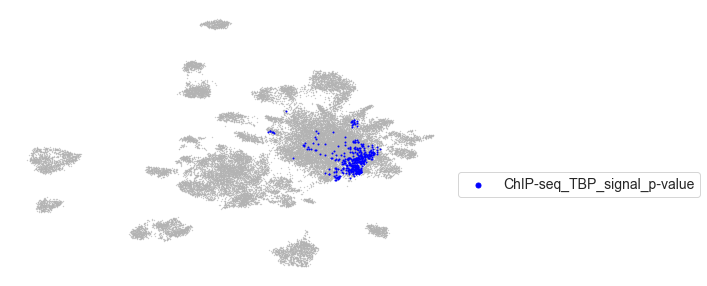

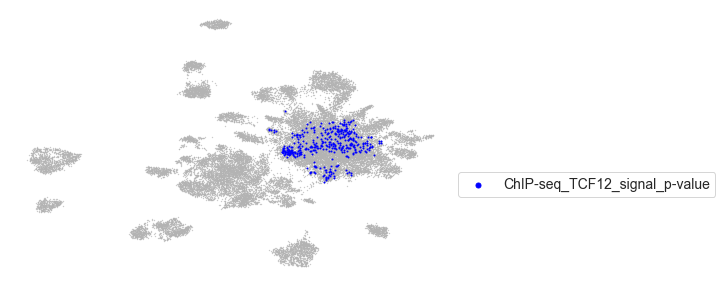

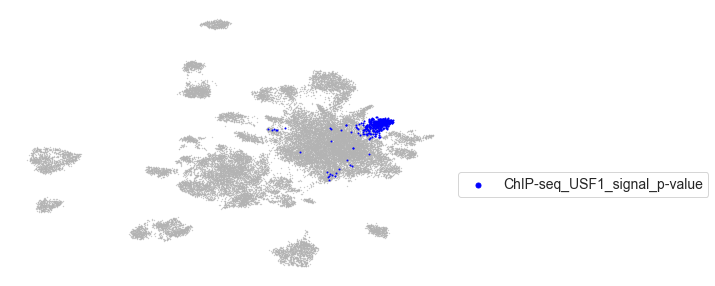

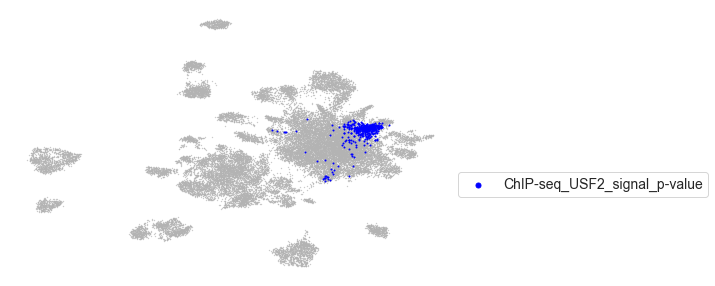

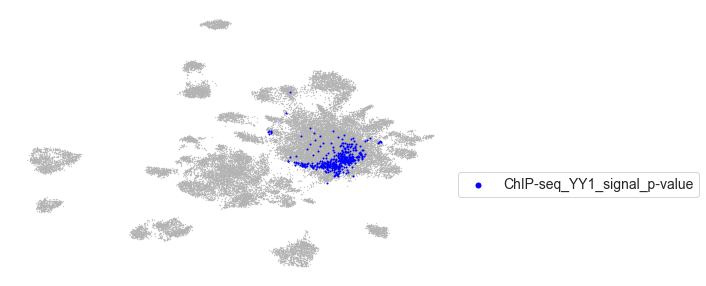

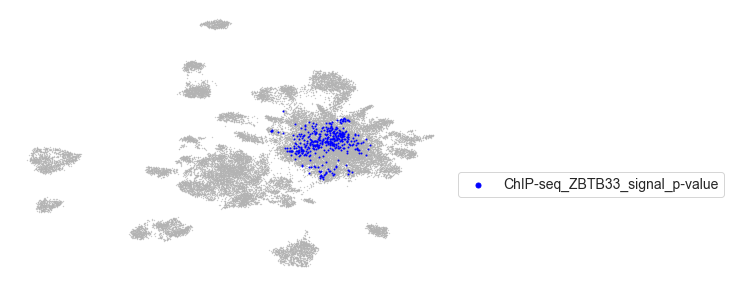

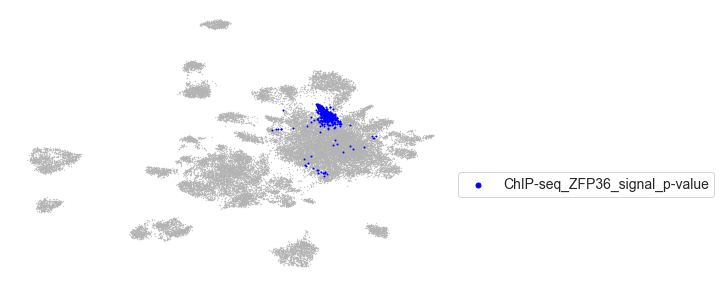

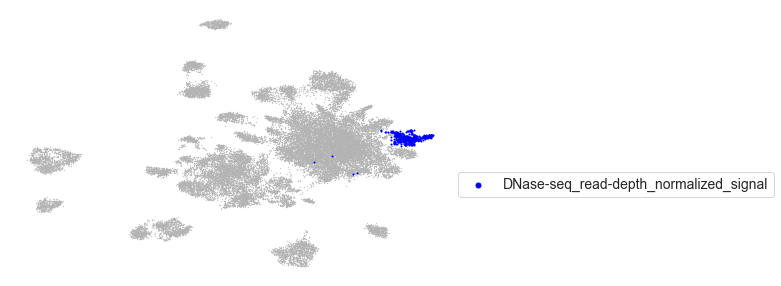

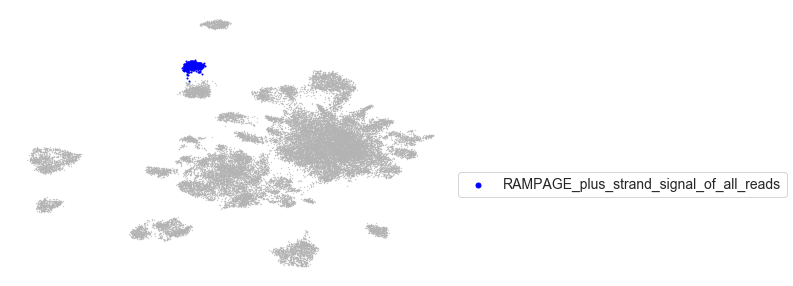

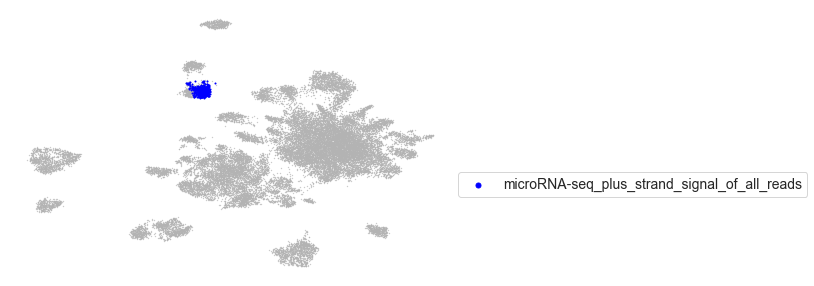

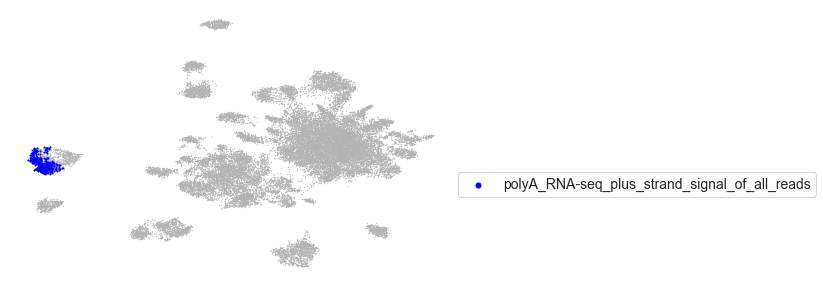

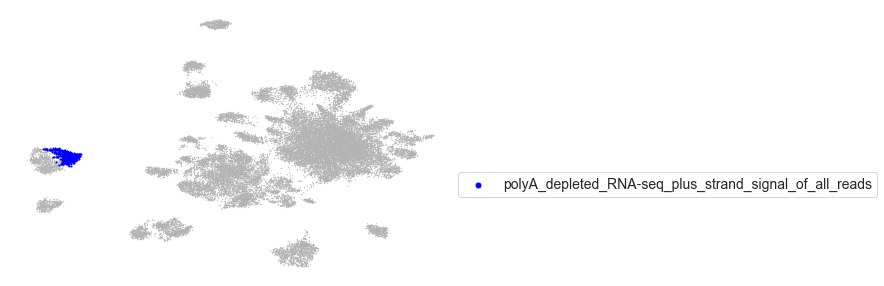

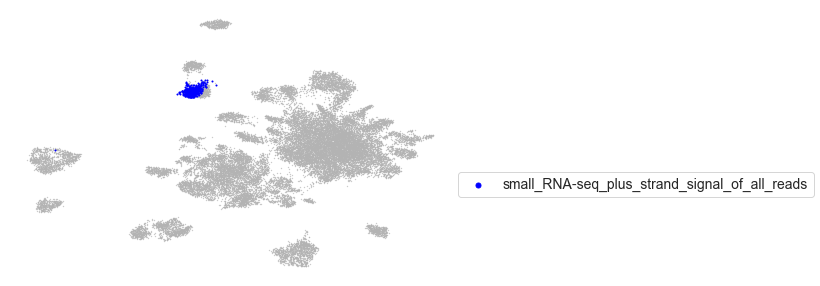

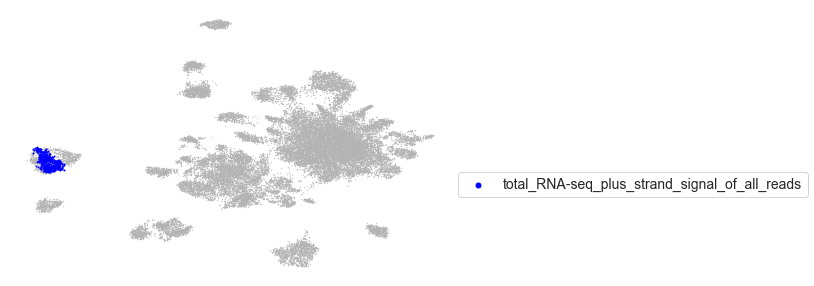

In [19]:
for exp in numpy.unique(all_experiments[:,1]):
    mask_ = all_experiments[:,1] == exp
    plt.figure(figsize=(8, 5), facecolor='w')
    #plt.subplot(121)
    plt.scatter(*X_umap_corr.T, s=0.1, color='0.7')
    plt.scatter(*X_umap_corr[mask_].T, s=1, label=exp, color='b')
    plt.axis('off')

    #plt.subplot(122)
    #plt.scatter(*X_umap_emd.T, s=0.1, color='0.7')
    #plt.scatter(*X_umap_emd[mask].T, s=1, label=exp, color='b')
    #plt.axis('off')
    
    plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)
    plt.show()

In [7]:
model = FacilityLocationSelection(100, pairwise_func='precomputed', verbose=True)
model.fit(imputed_correlations[his_mask][:, his_mask])

100%|██████████| 100/100 [00:03<00:00, 31.49it/s]


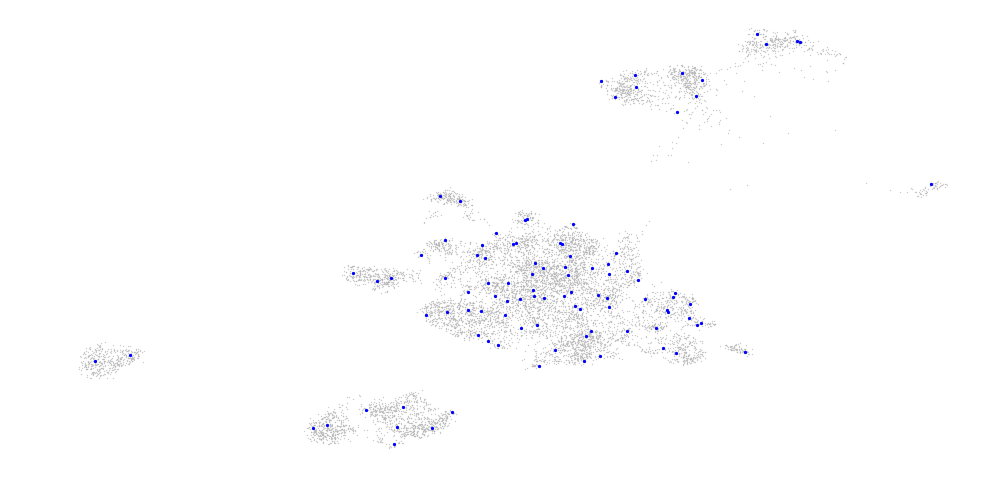

In [8]:
plt.figure(figsize=(14, 7), facecolor='w')
plt.scatter(*X_umap_corr[his_mask].T, s=0.1, label='Histone Modification', color='0.7')
plt.scatter(*X_umap_corr[his_mask][model.ranking].T, s=5, color='b')

#plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=10)
plt.tight_layout()
plt.axis('off')
plt.show()

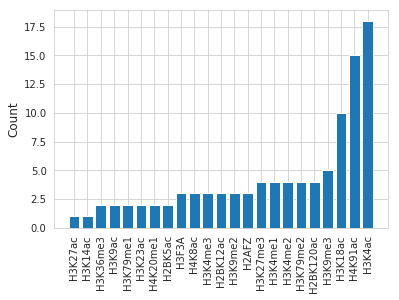

In [9]:
exp_subset = all_experiments[his_mask][model.ranking]

exps, counts = numpy.unique(exp_subset[:,1], return_counts=True)
exps = numpy.array([exp.replace("ChIP-seq_", "").replace("_signal_p-value", "") for exp in exps])

plt.figure(facecolor='w')
plt.bar(range(len(exps)), counts[numpy.argsort(counts)])
plt.xticks(range(len(exps)), exps[numpy.argsort(counts)], rotation=90)
plt.ylabel("Count", fontsize=12)
plt.show()

In [10]:
bool_mask = numpy.zeros(30800, dtype=bool)
bool_mask[mask] = True

model = FacilityLocationSelection(100, pairwise_func='precomputed', verbose=True, initial_subset=bool_mask[his_mask])
subset = model.fit_transform(imputed_correlations[his_mask][:, his_mask])

100%|██████████| 100/100 [00:01<00:00, 81.91it/s]


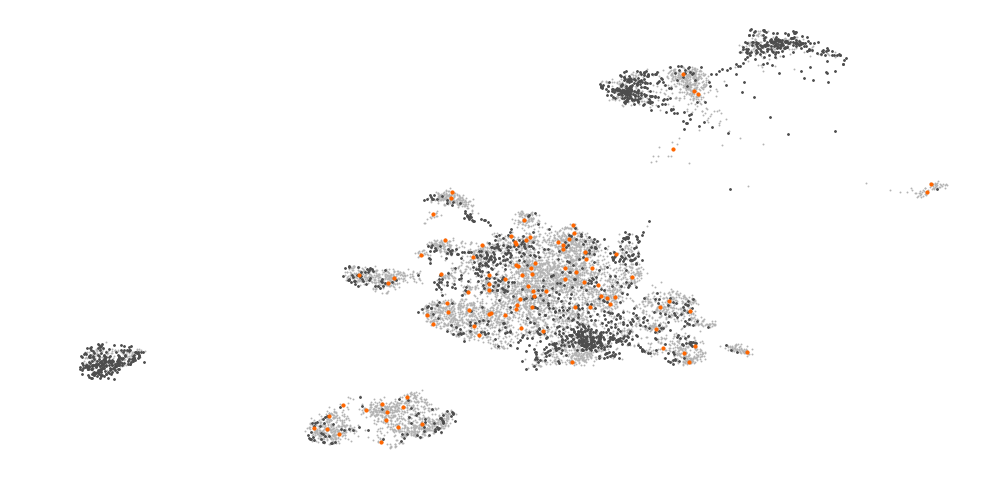

In [11]:
plt.figure(figsize=(14, 7), facecolor='w')
plt.scatter(*X_umap_corr[his_mask].T, s=0.8, label='Histone Modification', color='0.7')
plt.scatter(*X_umap_corr[bool_mask & his_mask].T, s=3, color='0.3')
plt.scatter(*X_umap_corr[his_mask][model.ranking].T, s=10, color='#FF6600')

#plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=10)
plt.tight_layout()
plt.axis('off')
plt.show()

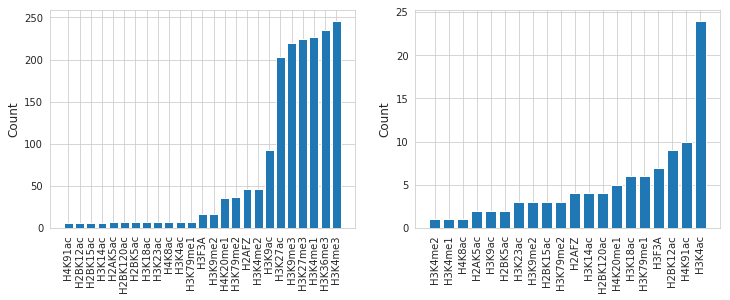

In [12]:
plt.figure(figsize=(12, 4), facecolor='w')
plt.subplot(121)

exp_subset = all_experiments[his_mask & bool_mask]
exps, counts = numpy.unique(exp_subset[:,1], return_counts=True)
exps = numpy.array([exp.replace("ChIP-seq_", "").replace("_signal_p-value", "") for exp in exps])

plt.bar(range(len(exps)), counts[numpy.argsort(counts)])
plt.xticks(range(len(exps)), exps[numpy.argsort(counts)], rotation=90)
plt.ylabel("Count", fontsize=12)

plt.subplot(122)

exp_subset = all_experiments[his_mask][model.ranking]
exps, counts = numpy.unique(exp_subset[:,1], return_counts=True)
exps = numpy.array([exp.replace("ChIP-seq_", "").replace("_signal_p-value", "") for exp in exps])

plt.bar(range(len(exps)), counts[numpy.argsort(counts)])
plt.xticks(range(len(exps)), exps[numpy.argsort(counts)], rotation=90)
plt.ylabel("Count", fontsize=12)
plt.show()

In [13]:
model1 = FacilityLocationSelection(500, pairwise_func='precomputed', verbose=True)
model1.fit(imputed_correlations)

model2 = FacilityLocationSelection(500, pairwise_func='precomputed', verbose=True, initial_subset=bool_mask)
model2.fit(imputed_correlations)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:02<20:09,  2.42s/it]

  0%|          | 2/500 [00:03<15:43,  1.89s/it]

  1%|          | 3/500 [00:03<11:46,  1.42s/it]

  1%|          | 4/500 [00:03<09:00,  1.09s/it]

  1%|          | 5/500 [00:03<06:48,  1.21it/s]

  1%|          | 6/500 [00:04<05:12,  1.58it/s]

  1%|▏         | 7/500 [00:04<05:14,  1.57it/s]

  2%|▏         | 10/500 [00:04<03:46,  2.17it/s]

  2%|▏         | 11/500 [00:05<03:08,  2.60it/s]

  3%|▎         | 14/500 [00:05<02:18,  3.50it/s]

  3%|▎         | 16/500 [00:05<02:02,  3.95it/s]

  3%|▎         | 17/500 [00:05<01:53,  4.26it/s]

  4%|▎         | 18/500 [00:06<03:38,  2.20it/s]

  4%|▍         | 19/500 [00:06<02:50,  2.82it/s]

  4%|▍         | 21/500 [00:07<02:09,  3.70it/s]

  5%|▍         | 23/500 [00:07<01:38,  4.84it/s]

  5%|▌         | 25/500 [00:07<01:28,  5.39it/s]

  5%|▌         | 26/500 [00:07<01:31,  5.16it/s]

  6%|▌         | 28/500 [

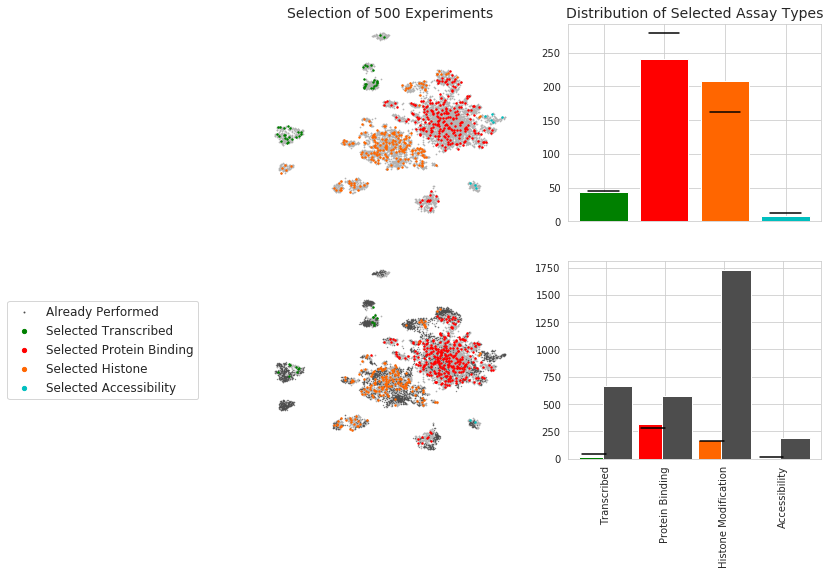

In [14]:
ranking1 = numpy.zeros(30800, dtype=bool)
ranking1[model1.ranking[:500]] = True

mask11 = ranking1 & rna_mask
mask12 = ranking1 & tf_mask
mask13 = ranking1 & his_mask
mask14 = ranking1 & acc_mask

plt.figure(figsize=(10, 8), facecolor='w')
plt.subplot(221)
plt.title("Selection of 500 Experiments", fontsize=14)
plt.scatter(*X_umap_corr.T[:, ::5], s=0.5, color='0.7')
plt.scatter(*X_umap_corr[mask11].T, s=2, label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask12].T, s=2, label='Selected Protein Binding', color='r')
plt.scatter(*X_umap_corr[mask13].T, s=2, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask14].T, s=2, label='Selected Accessibility', color='c')
plt.axis('off')

#plt.legend(fontsize=14, loc=(-1.01, 0.3), markerscale=2)

plt.subplot(222)
plt.title("Distribution of Selected Assay Types", fontsize=14)
plt.bar(range(0, 1), [mask11.sum()], color='g')
plt.bar(range(1, 2), [mask12.sum()], color='r')
plt.bar(range(2, 3), [mask13.sum()], color='#FF6600')
plt.bar(range(3, 4), [mask14.sum()], color='c')

plt.plot([-0.25, 0.25], [rna_mask.mean() * 500]*2, color='k')
plt.plot([ 0.75, 1.25], [tf_mask.mean() * 500]*2, color='k')
plt.plot([ 1.75, 2.25], [his_mask.mean() * 500]*2, color='k')
plt.plot([ 2.75, 3.25], [acc_mask.mean() * 500]*2, color='k')

plt.xticks(range(4), ['', '', '', ''], rotation=90)


ranking2 = numpy.zeros(30800, dtype=bool)
ranking2[model2.ranking[:500]] = True

mask21 = ranking2 & rna_mask
mask22 = ranking2 & tf_mask
mask23 = ranking2 & his_mask
mask24 = ranking2 & acc_mask

plt.subplot(223)
plt.scatter(*X_umap_corr.T[:, ::5], s=0.5, color='0.7')
plt.scatter(*X_umap_corr[bool_mask].T, s=0.1, label='Already Performed', color='0.3')
plt.scatter(*X_umap_corr[mask21].T, s=2, label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask22].T, s=2, label='Selected Protein Binding', color='r')
plt.scatter(*X_umap_corr[mask23].T, s=2, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask24].T, s=2, label='Selected Accessibility', color='c')
plt.axis('off')
plt.legend(fontsize=12, loc=(-1.01, 0.3), markerscale=3)

plt.subplot(224)
plt.bar([-0.2], [mask21.sum()], width=0.5, color='g')
plt.bar([0.8], [mask22.sum()], width=0.5, color='r')
plt.bar([1.8], [mask23.sum()], width=0.5, color='#FF6600')
plt.bar([2.8], [mask24.sum()], width=0.5, color='c')
plt.bar([0.2, 1.2, 2.2, 3.2], [rna_mask[bool_mask].sum(), tf_mask[bool_mask].sum(), his_mask[bool_mask].sum(), acc_mask[bool_mask].sum()], width=0.5, color='0.3')

plt.plot([-0.4, 0], [rna_mask.mean() * 500]*2, color='k')
plt.plot([0.6, 1.0], [tf_mask.mean() * 500]*2, color='k')
plt.plot([1.6, 2.0], [his_mask.mean() * 500]*2, color='k')
plt.plot([2.6, 3.0], [acc_mask.mean() * 500]*2, color='k')
plt.xticks(range(4), ['Transcribed', 'Protein Binding', 'Histone Modification', 'Accessibility'], rotation=90)

plt.savefig("xselect-plots.pdf")
plt.show()

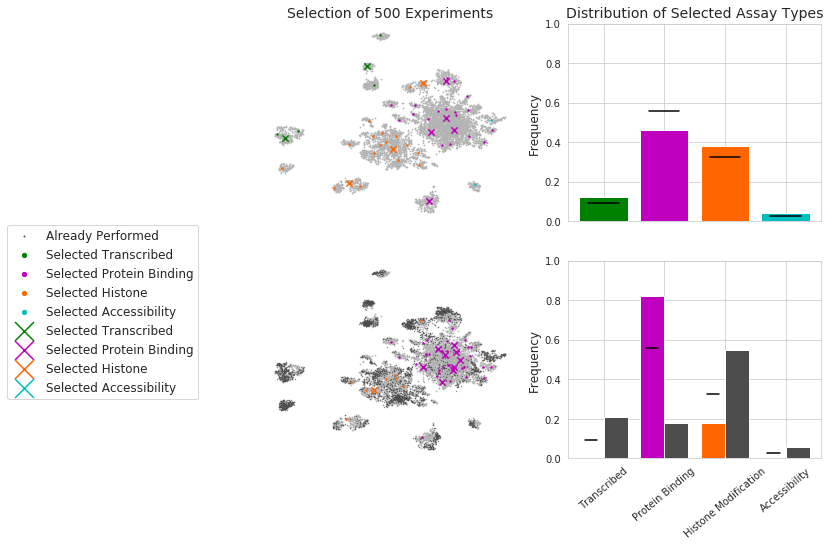

In [15]:
ranking11 = numpy.zeros(30800, dtype=bool)
ranking11[model1.ranking[10:50]] = True

ranking12 = numpy.zeros(30800, dtype=bool)
ranking12[model1.ranking[:10]] = True

ranking1 = numpy.zeros(30800, dtype=bool)
ranking1[model1.ranking[:50]] = True

mask111 = ranking11 & rna_mask
mask121 = ranking11 & tf_mask
mask131 = ranking11 & his_mask
mask141 = ranking11 & acc_mask

mask112 = ranking12 & rna_mask
mask122 = ranking12 & tf_mask
mask132 = ranking12 & his_mask
mask142 = ranking12 & acc_mask

mask11 = ranking1 & rna_mask
mask12 = ranking1 & tf_mask
mask13 = ranking1 & his_mask
mask14 = ranking1 & acc_mask

plt.figure(figsize=(10, 8), facecolor='w')
plt.subplot(221)
plt.title("Selection of 500 Experiments", fontsize=14)
plt.scatter(*X_umap_corr.T[:, ::5], s=0.5, color='0.7')
plt.scatter(*X_umap_corr[mask111].T, s=2, label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask121].T, s=2, label='Selected Protein Binding', color='m')
plt.scatter(*X_umap_corr[mask131].T, s=2, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask141].T, s=2, label='Selected Accessibility', color='c')

plt.scatter(*X_umap_corr[mask112].T, s=40, marker='x', label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask122].T, s=40, marker='x', label='Selected Protein Binding', color='m')
plt.scatter(*X_umap_corr[mask132].T, s=40, marker='x', label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask142].T, s=40, marker='x', label='Selected Accessibility', color='c')
plt.axis('off')

#plt.legend(fontsize=14, loc=(-1.01, 0.3), markerscale=2)

plt.subplot(222)
plt.title("Distribution of Selected Assay Types", fontsize=14)
plt.bar(range(0, 1), [mask11.sum() / 50.], color='g')
plt.bar(range(1, 2), [mask12.sum() / 50.], color='m')
plt.bar(range(2, 3), [mask13.sum() / 50.], color='#FF6600')
plt.bar(range(3, 4), [mask14.sum() / 50.], color='c')

plt.plot([-0.25, 0.25], [rna_mask.mean()]*2, color='k')
plt.plot([ 0.75, 1.25], [tf_mask.mean()]*2, color='k')
plt.plot([ 1.75, 2.25], [his_mask.mean()]*2, color='k')
plt.plot([ 2.75, 3.25], [acc_mask.mean()]*2, color='k')

plt.xticks(range(4), ['', '', '', ''], rotation=90)
plt.ylabel("Frequency", fontsize=12)
plt.ylim(0, 1)


ranking21 = numpy.zeros(30800, dtype=bool)
ranking21[model2.ranking[10:50]] = True

ranking22 = numpy.zeros(30800, dtype=bool)
ranking22[model2.ranking[:10]] = True

ranking2 = numpy.zeros(30800, dtype=bool)
ranking2[model2.ranking[:50]] = True

mask211 = ranking21 & rna_mask
mask221 = ranking21 & tf_mask
mask231 = ranking21 & his_mask
mask241 = ranking21 & acc_mask

mask212 = ranking22 & rna_mask
mask222 = ranking22 & tf_mask
mask232 = ranking22 & his_mask
mask242 = ranking22 & acc_mask

mask21 = ranking2 & rna_mask
mask22 = ranking2 & tf_mask
mask23 = ranking2 & his_mask
mask24 = ranking2 & acc_mask

n = bool_mask.sum() * 1.

plt.subplot(223)
plt.scatter(*X_umap_corr.T[:, ::5], s=0.5, color='0.7')
plt.scatter(*X_umap_corr[bool_mask].T, s=0.1, label='Already Performed', color='0.3')
plt.scatter(*X_umap_corr[mask211].T, s=2, label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask221].T, s=2, label='Selected Protein Binding', color='m')
plt.scatter(*X_umap_corr[mask231].T, s=2, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask241].T, s=2, label='Selected Accessibility', color='c')

plt.scatter(*X_umap_corr[mask212].T, s=40, marker='x', label='Selected Transcribed', color='g')
plt.scatter(*X_umap_corr[mask222].T, s=40, marker='x', label='Selected Protein Binding', color='m')
plt.scatter(*X_umap_corr[mask232].T, s=40, marker='x', label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap_corr[mask242].T, s=40, marker='x', label='Selected Accessibility', color='c')

plt.axis('off')
plt.legend(fontsize=12, loc=(-1.01, 0.3), markerscale=3)

plt.subplot(224)
plt.bar([-0.2], [mask21.sum() / 50.], width=0.4, color='g')
plt.bar([0.8], [mask22.sum() / 50.], width=0.4, color='m')
plt.bar([1.8], [mask23.sum() / 50.], width=0.4, color='#FF6600')
plt.bar([2.8], [mask24.sum() / 50.], width=0.4, color='c')
plt.bar([0.2, 1.2, 2.2, 3.2], [rna_mask[bool_mask].sum() / n, tf_mask[bool_mask].sum() / n, 
                               his_mask[bool_mask].sum() / n, acc_mask[bool_mask].sum() / n], 
        width=0.4, color='0.3')

plt.plot([-0.3, -0.1], [rna_mask.mean()]*2, color='k')
plt.plot([0.7, 0.9], [tf_mask.mean()]*2, color='k')
plt.plot([1.7, 1.9], [his_mask.mean()]*2, color='k')
plt.plot([2.7, 2.9], [acc_mask.mean()]*2, color='k')
plt.xticks(range(4), ['Transcribed', 'Protein Binding', 'Histone Modification', 'Accessibility'], rotation=40)
plt.ylabel("Frequency", fontsize=12)
plt.ylim(0, 1)

plt.savefig("xselect-plots.pdf")
plt.show()

In [16]:
bool_mask.sum()

3150

In [17]:
mask11.sum(), mask12.sum(), mask13.sum(), mask14.sum(), mask21.sum(), mask22.sum(), mask23.sum(), mask24.sum()

(6, 23, 19, 2, 0, 41, 9, 0)

In [18]:
rna_mask.mean() * 50, tf_mask.mean() * 50, his_mask.mean() * 50, acc_mask.mean() * 50

(4.545454545454546, 27.92207792207792, 16.233766233766232, 1.2987012987012987)

In [19]:
model1 = FacilityLocationSelection(30800, pairwise_func='precomputed', verbose=True)
model1.fit(imputed_correlations)

model2 = FacilityLocationSelection(int(30800 - bool_mask.sum()), pairwise_func='precomputed', verbose=True, initial_subset=bool_mask)
model2.fit(imputed_correlations)



  0%|          | 0/30800 [00:00<?, ?it/s]


  0%|          | 0/30800 [00:00<?, ?it/s]


  0%|          | 1/30800 [00:10<87:37:02, 10.24s/it]


  0%|          | 2/30800 [00:31<114:42:23, 13.41s/it]


  0%|          | 3/30800 [00:32<84:29:12,  9.88s/it] 


  0%|          | 4/30800 [00:33<61:14:05,  7.16s/it]


  0%|          | 5/30800 [00:33<43:25:07,  5.08s/it]


  0%|          | 6/30800 [00:34<31:29:47,  3.68s/it]


  0%|          | 7/30800 [00:35<26:45:02,  3.13s/it]


  0%|          | 8/30800 [00:36<19:49:47,  2.32s/it]


  0%|          | 9/30800 [00:42<29:32:07,  3.45s/it]


  0%|          | 10/30800 [00:43<23:26:22,  2.74s/it]


  0%|          | 11/30800 [00:44<18:22:21,  2.15s/it]


  0%|          | 12/30800 [00:44<14:13:09,  1.66s/it]


  0%|          | 13/30800 [00:45<12:41:09,  1.48s/it]


  0%|          | 14/30800 [00:47<12:36:54,  1.48s/it]


  0%|          | 15/30800 [00:51<19:14:42,  2.25s/it]


  0%|          | 16/30800 [00:52<14:57:26,  1.75s/it]


  0%|          | 17/3

In [20]:
all_experiments[model1.ranking]

array([['J011', 'ChIP-seq_SIN3A_signal_p-value'],
       ['J624', 'ChIP-seq_H3K9ac_signal_p-value'],
       ['J389', 'total_RNA-seq_plus_strand_signal_of_all_reads'],
       ...,
       ['J342', 'RAMPAGE_plus_strand_signal_of_all_reads'],
       ['J359', 'ChIP-seq_H3K4me3_signal_p-value'],
       ['J342', 'CAGE_plus_strand_signal_of_all_reads']], dtype='<U54')

In [21]:
all_experiments[model2.ranking]

array([['J209', 'ChIP-seq_RCOR1_signal_p-value'],
       ['J337', 'ChIP-seq_RCOR1_signal_p-value'],
       ['J179', 'ChIP-seq_ETS1_signal_p-value'],
       ...,
       ['J430', 'CAGE_plus_strand_signal_of_all_reads'],
       ['J359', 'ChIP-seq_H3K4me3_signal_p-value'],
       ['J359', 'CAGE_plus_strand_signal_of_all_reads']], dtype='<U54')

In [22]:
numpy.savetxt("all_experiment_ranking.tsv", all_experiments[model1.ranking], 
              delimiter="\t", fmt='%s', header='Biosample\tAssay')
numpy.savetxt("unperformed_experiment_ranking.tsv", all_experiments[model2.ranking], 
              delimiter="\t", fmt='%s', header='Biosample\tAssay')

In [23]:
ranking1.shape, ranking2.shape

((30800,), (30800,))

In [24]:
ranking1 = numpy.zeros(30800, dtype=bool)
ranking1[model1.ranking[:27000]] = True

ranking2 = numpy.zeros(30800, dtype=bool)
ranking2[model2.ranking[:27000]] = True

(ranking1 & bool_mask).sum(), (ranking2 & bool_mask).sum()

(2546, 0)